<a href="https://colab.research.google.com/github/Karthik-C6/Rice-grain-classification/blob/main/Rice_grain_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Rice.csv to Rice.csv


Importing the Required libraries

In [ ]:
import io
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
#import seaborn as sns

from warnings import filterwarnings
filterwarnings(action='ignore')

# **Data Transformation**

Convering the csv data into the dataframe called 'rice' by using pandas.

In [ ]:
rice = pd.read_csv("Rice.csv")
print("Successfully Imported Data!")
rice.describe()

Successfully Imported Data!


,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


# **Data Cleaning**

Finding number of null values in each attribute

In [ ]:
print(rice.isna().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64


Droping the tuple which contain null values

In [ ]:
rice = rice.dropna()
#rice

In [ ]:
print(rice.isna().sum())

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Eccentricity         0
Convex_Area          0
Extent               0
Class                0
dtype: int64


# **Data Normalization**

In [ ]:
rice['Convex_Area'] = (rice['Convex_Area'] - rice['Convex_Area'].min()) / (rice['Convex_Area'].max() - rice['Convex_Area'].min())
rice['Area'] = (rice['Area'] - rice['Area'].min()) / (rice['Area'].max() - rice['Area'].min())
rice['Perimeter'] = (rice['Perimeter'] - rice['Perimeter'].min()) / (rice['Perimeter'].max() - rice['Perimeter'].min())
rice['Major_Axis_Length'] = (rice['Major_Axis_Length'] - rice['Major_Axis_Length'].min())/ (rice['Major_Axis_Length'].max() - rice['Major_Axis_Length'].min())
rice['Minor_Axis_Length'] = (rice['Minor_Axis_Length'] - rice['Minor_Axis_Length'].min())/ (rice['Minor_Axis_Length'].max() - rice['Minor_Axis_Length'].min())
d = {'Cammeo':1,'Osmancik':2}
rice['Class'] = rice['Class'].map(d)
rice.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,0.450337,0.502462,0.464145,0.557828,0.886871,0.459696,0.661934,1.572178
std,0.152470,0.188000,0.186127,0.119346,0.020818,0.156204,0.077239,0.494828
min,0.000000,0.000000,0.000000,0.000000,0.777233,0.000000,0.497413,1.000000
25%,0.336164,0.354086,0.310300,0.483217,0.872402,0.343113,0.598862,1.000000
50%,0.428666,0.474013,0.432505,0.560346,0.889050,0.438071,0.645361,2.000000
75%,0.563193,0.657969,0.621743,0.637601,0.902588,0.576741,0.726562,2.000000
max,1.000000,1.000000,1.000000,1.000000,0.948007,1.000000,0.861050,2.000000


In [ ]:
rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
0,0.675937,0.879232,0.901216,0.532417,0.928882,0.693917,0.572896,1
1,0.625330,0.714095,0.648087,0.670663,0.895405,0.646009,0.615436,1
2,0.623394,0.750066,0.734349,0.588124,0.912118,0.635636,0.693259,1
3,0.495071,0.524136,0.512800,0.581461,0.891861,0.496220,0.640669,1
4,0.628146,0.781992,0.709138,0.620288,0.906691,0.662711,0.646024,1
...,...,...,...,...,...,...,...,...
3805,0.342369,0.299758,0.269049,0.546223,0.864280,0.343267,0.681012,2
3806,0.358564,0.328975,0.239480,0.623415,0.845850,0.367528,0.694279,2
3807,0.430030,0.440458,0.408641,0.567997,0.881144,0.432665,0.626739,2
3808,0.205158,0.175325,0.169922,0.389045,0.874406,0.208685,0.659064,2


# **Data Reduction**

Data Reduction
finding corelation for each attribute

In [ ]:
original = rice
rice.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Convex_Area,Extent,Class
Area,1.000000,0.966453,0.903015,0.787840,0.352095,0.998939,-0.061184,-0.746400
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,0.969937,-0.130923,-0.806572
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,0.903381,-0.139562,-0.827824
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.787318,0.063366,-0.370355
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,0.352716,-0.198580,-0.588916
Convex_Area,0.998939,0.969937,0.903381,0.787318,0.352716,1.000000,-0.065826,-0.750424
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,-0.065826,1.000000,0.117727
Class,-0.746400,-0.806572,-0.827824,-0.370355,-0.588916,-0.750424,0.117727,1.000000


In above output,
Area and Convex_Area has 0.998939 correlation nearly 1
so we can remove one of it.

In [ ]:
rice = rice.drop("Convex_Area",axis='columns')
rice

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class
0,0.675937,0.879232,0.901216,0.532417,0.928882,0.572896,1
1,0.625330,0.714095,0.648087,0.670663,0.895405,0.615436,1
2,0.623394,0.750066,0.734349,0.588124,0.912118,0.693259,1
3,0.495071,0.524136,0.512800,0.581461,0.891861,0.640669,1
4,0.628146,0.781992,0.709138,0.620288,0.906691,0.646024,1
...,...,...,...,...,...,...,...
3805,0.342369,0.299758,0.269049,0.546223,0.864280,0.681012,2
3806,0.358564,0.328975,0.239480,0.623415,0.845850,0.694279,2
3807,0.430030,0.440458,0.408641,0.567997,0.881144,0.626739,2
3808,0.205158,0.175325,0.169922,0.389045,0.874406,0.659064,2


Again finding correlation for new dataset

In [ ]:
rice.corr()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Eccentricity,Extent,Class
Area,1.000000,0.966453,0.903015,0.787840,0.352095,-0.061184,-0.746400
Perimeter,0.966453,1.000000,0.971884,0.629828,0.544601,-0.130923,-0.806572
Major_Axis_Length,0.903015,0.971884,1.000000,0.452092,0.710897,-0.139562,-0.827824
Minor_Axis_Length,0.787840,0.629828,0.452092,1.000000,-0.291683,0.063366,-0.370355
Eccentricity,0.352095,0.544601,0.710897,-0.291683,1.000000,-0.198580,-0.588916
Extent,-0.061184,-0.130923,-0.139562,0.063366,-0.198580,1.000000,0.117727
Class,-0.746400,-0.806572,-0.827824,-0.370355,-0.588916,0.117727,1.000000


Now, the correlation b/w Perimeter and Major_Axis_length has 0.971884 nearly 1
we can remove any one of it.

In [ ]:
rice = rice.drop("Major_Axis_Length",axis='columns')
rice

,Area,Perimeter,Minor_Axis_Length,Eccentricity,Extent,Class
0,0.675937,0.879232,0.532417,0.928882,0.572896,1
1,0.625330,0.714095,0.670663,0.895405,0.615436,1
2,0.623394,0.750066,0.588124,0.912118,0.693259,1
3,0.495071,0.524136,0.581461,0.891861,0.640669,1
4,0.628146,0.781992,0.620288,0.906691,0.646024,1
...,...,...,...,...,...,...
3805,0.342369,0.299758,0.546223,0.864280,0.681012,2
3806,0.358564,0.328975,0.623415,0.845850,0.694279,2
3807,0.430030,0.440458,0.567997,0.881144,0.626739,2
3808,0.205158,0.175325,0.389045,0.874406,0.659064,2


In [ ]:
rice.corr()

,Area,Perimeter,Minor_Axis_Length,Eccentricity,Extent,Class
Area,1.000000,0.966453,0.787840,0.352095,-0.061184,-0.746400
Perimeter,0.966453,1.000000,0.629828,0.544601,-0.130923,-0.806572
Minor_Axis_Length,0.787840,0.629828,1.000000,-0.291683,0.063366,-0.370355
Eccentricity,0.352095,0.544601,-0.291683,1.000000,-0.198580,-0.588916
Extent,-0.061184,-0.130923,0.063366,-0.198580,1.000000,0.117727
Class,-0.746400,-0.806572,-0.370355,-0.588916,0.117727,1.000000


No handles with labels found to put in legend.


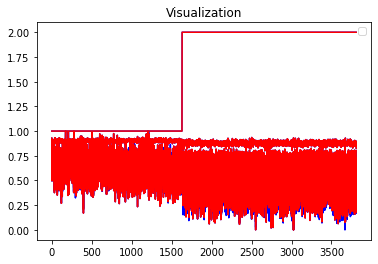

In [ ]:
plt.plot(original,color='blue')
plt.plot(rice,color='red')
plt.legend()
plt.title('Visualization')
plt.show()

# **Split Train and Test data**

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split


features = ['Area','Perimeter','Minor_Axis_Length','Eccentricity','Extent']
x = rice[features]
y = rice['Class']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# **Decission Tree Classifier**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
import sklearn.metrics as metrics

dtree = DecisionTreeClassifier()
dtree = dtree.fit(x_train,y_train)


In [ ]:
y_pred = dtree.predict(x_test)
accuracy = dtree.score(x_test,y_test)
accuracy

0.884514435695538

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print("Confussion matrix - ",matrix)
accuracy = (matrix[0][0] + matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
print("Accuracy - ",accuracy)
print("f1 score - ",metrics.f1_score(y_test, y_pred))

Confussion matrix -  [[303  47]
 [ 41 371]]
Accuracy -  0.884514435695538
f1 score -  0.8731988472622478


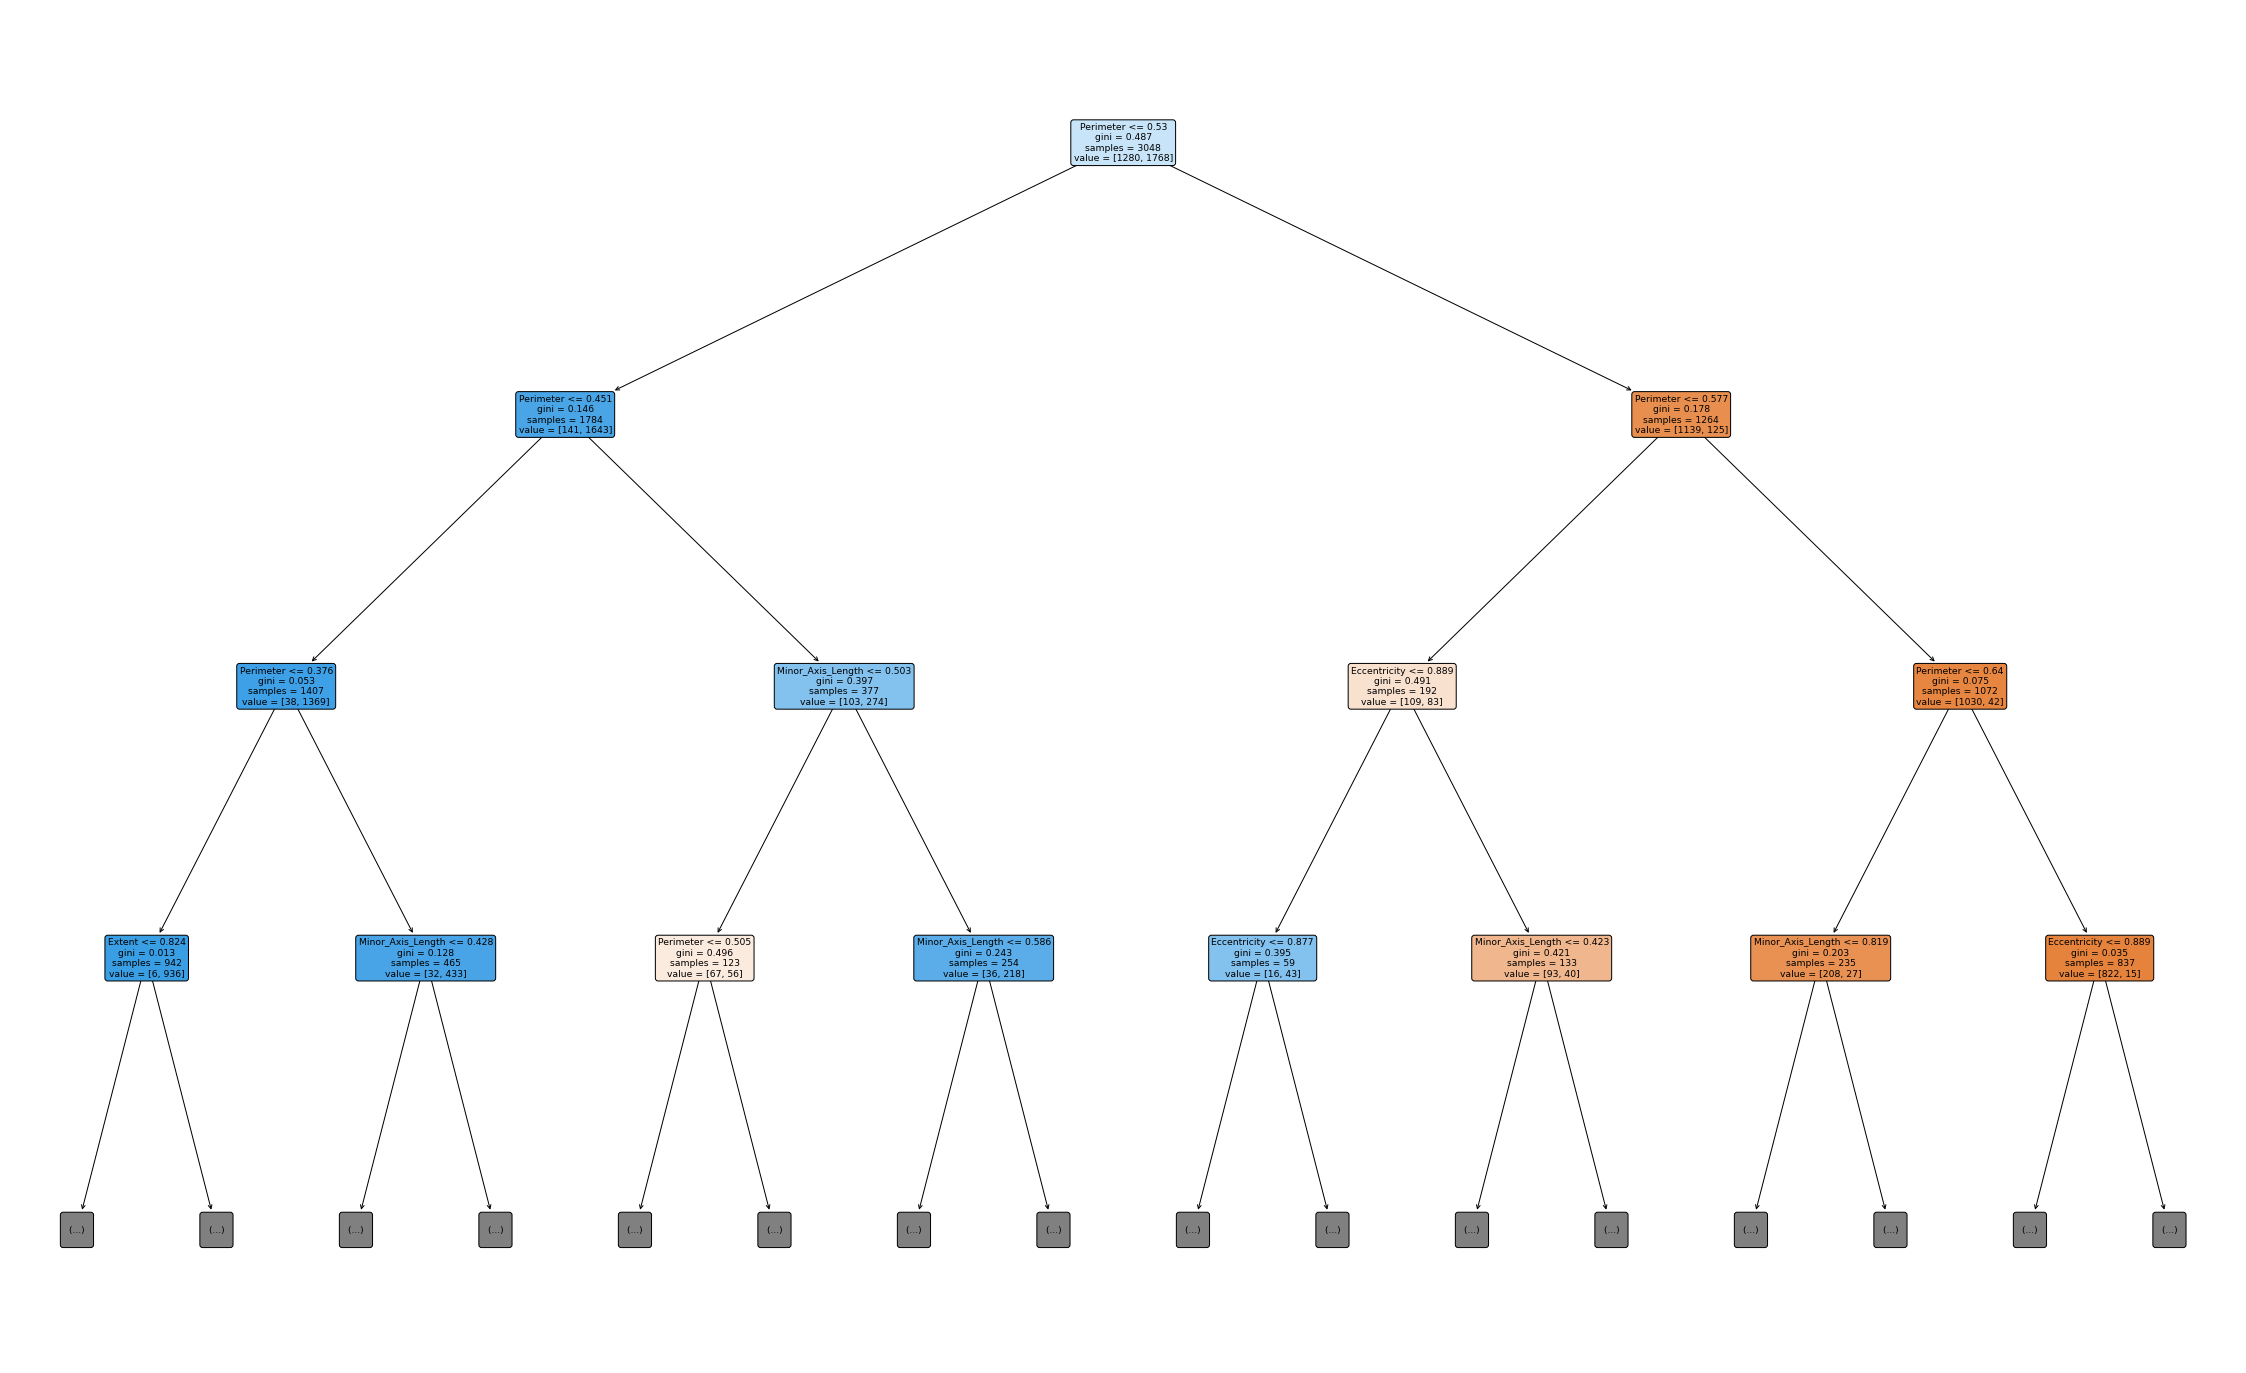

In [ ]:
from sklearn.tree import plot_tree,export_text
import matplotlib.pyplot as plt
plt.figure(figsize=(40,25))
plot_tree(dtree,feature_names=features,max_depth=3,filled=True,rounded=True);

# **Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
reg = LogisticRegression(random_state = 10)
reg.fit(x_train,y_train)

LogisticRegression(random_state=10)

In [ ]:
import math
from sklearn.metrics import accuracy_score
y_pred = reg.predict(x_test)
accuracy_score(y_test,y_pred)

0.9251968503937008

In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print("Confussion matrix - ",matrix)
accuracy = (matrix[0][0] + matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
print("Accuracy - ",accuracy)
print("f1 score - ",metrics.f1_score(y_test, y_pred))

Confussion matrix -  [[315  35]
 [ 22 390]]
Accuracy -  0.9251968503937008
f1 score -  0.9170305676855894


# **Cluster Analaysis**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [ ]:
print(knn.score(x_test,y_test))
y_pred = knn.predict(x_test)

0.9146981627296588


In [ ]:
matrix = confusion_matrix(y_test,y_pred)
print("Confussion matrix - ",matrix)
accuracy = (matrix[0][0] + matrix[1][1])/(matrix[0][0]+matrix[0][1]+matrix[1][0]+matrix[1][1])
print("Accuracy -",accuracy)
print("f1 score - ",metrics.f1_score(y_test, y_pred))

Confussion matrix -  [[316  34]
 [ 31 381]]
Accuracy - 0.9146981627296588
f1 score -  0.9067431850789096


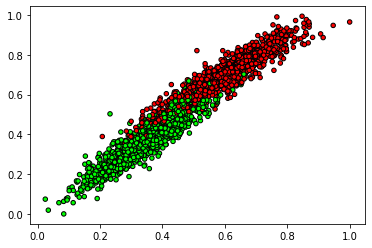

In [ ]:
from matplotlib.colors import ListedColormap
cmap = ListedColormap(['#FF0000','#00FF00'])

X = np.array(x_train.values.tolist())
y = np.array(y_train)
plt.figure()
plt.scatter(X[:,0],X[:,1],c=y,cmap=cmap,edgecolors='k',s=20)
plt.show()
